# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [19]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

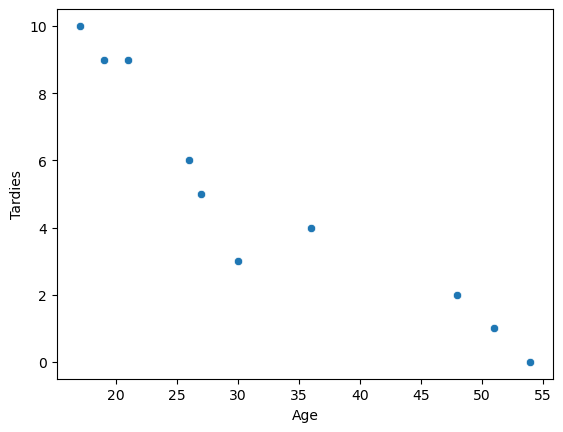

In [3]:
sns.scatterplot(data=student_data, x='Age', y='Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here:*


There is a possible visible trend between age and tardies


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [5]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [59]:
X=student_data["Age"].values.reshape(-1,1)
y=student_data["Tardies"]

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5,random_state=42)

In [166]:
model=LinearRegression()

In [168]:
model.fit(X_train,y_train)

LinearRegression()

Plot your regression model on your scatter plot.

In [170]:
predictions=model.predict(X_test)
predictions

array([-3.99260042, -2.89852008, -1.80443975,  9.50105708,  6.21881607])

In [180]:
ev_df=pd.DataFrame({"actual":y_test,"predictions":predictions})

In [174]:
ev_df

,actual,predictions
8,0,-3.992600
1,1,-2.898520
5,2,-1.804440
0,10,9.501057
7,6,6.218816


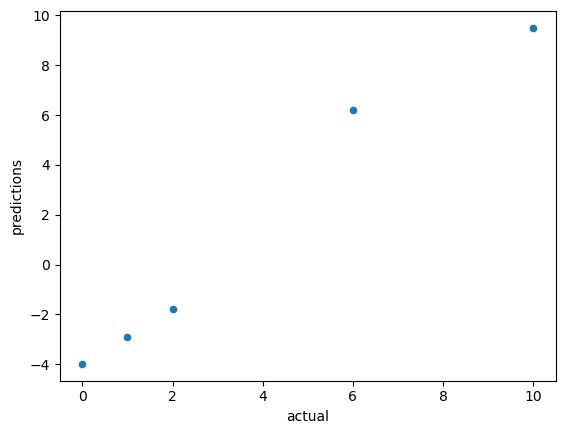

In [176]:
sns.scatterplot(data=ev_df, x='actual', y='predictions')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [196]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week4/lab-regression-analysis-en/vehicles.csv")

In [198]:
vehicles.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [210]:
df_num=vehicles.select_dtypes(include="number")

In [214]:
df_a=df_num.drop(["Engine Displacement","City MPG","Highway MPG"],axis=1)

In [216]:
df_a

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,244.000000,1100
35948,2014,3.0,9.155833,36,243.000000,1100
35949,2015,3.0,9.155833,36,244.000000,1100
35950,2016,3.0,9.155833,36,246.000000,1100


In [220]:
df_a.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [260]:
X=df_a.drop("CO2 Emission Grams/Mile",axis=1)
y=df_a["CO2 Emission Grams/Mile"]

In [262]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [264]:
model_vehicles=LinearRegression()

In [266]:
model_vehicles.fit(X_train,y_train)

LinearRegression()

In [268]:
predict=model_vehicles.predict(X_test)

In [270]:
compare=pd.DataFrame({"Actual":y_test,"predicted":predict})

In [276]:
compare.sample(6)

,Actual,predicted
22843,321.000000,309.599616
4546,555.437500,552.778523
29776,429.000000,433.149552
15578,592.466667,584.973066
33040,403.954545,401.496874
20481,348.000000,335.115679


In [278]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [288]:
mse=mean_squared_error(y_test,predict,squared=False)

C:\Users\igara\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
"""
I used linear regression because im trying to predict a continous variable 
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [290]:
mse

16.02794770139521

In [284]:
r2=r2_score(y_test,predict)
r2

0.9816221846322115

In [298]:
model_vehicles.coef_

array([-0.3333413 ,  1.9259036 , 18.92797555, -3.02876609,  0.03318857])

In [302]:
model_vehicles.intercept_

795.4084761400295

In [306]:
import statsmodels.api as sm

In [308]:
X_con=sm.add_constant(X)

In [314]:
model_2=sm.OLS(y,X_con).fit()

In [318]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                             15:55:02   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [320]:
"""
the mse tells me that in avarage there is a difference of 16 between values and the prediction
the r2 is .98 which means the model fits really good in the actual data
the fuel barrel/year has the highes coeficient which means that it is the variable that has more impact in the CO2 emissions

"""

'\nthe mse tells me that in avarage there is a difference of 16 between values and the prediction\nthe r2 is .98 which means the model fits really good in the actual data\nthe fuel barrel/year has the highes coeficient which means that it is the variable that has more impact in the CO2 emissions\n\n'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [324]:
party = pd.DataFrame({"X": [1,3,4,6,8,9,11,14], "Y": [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

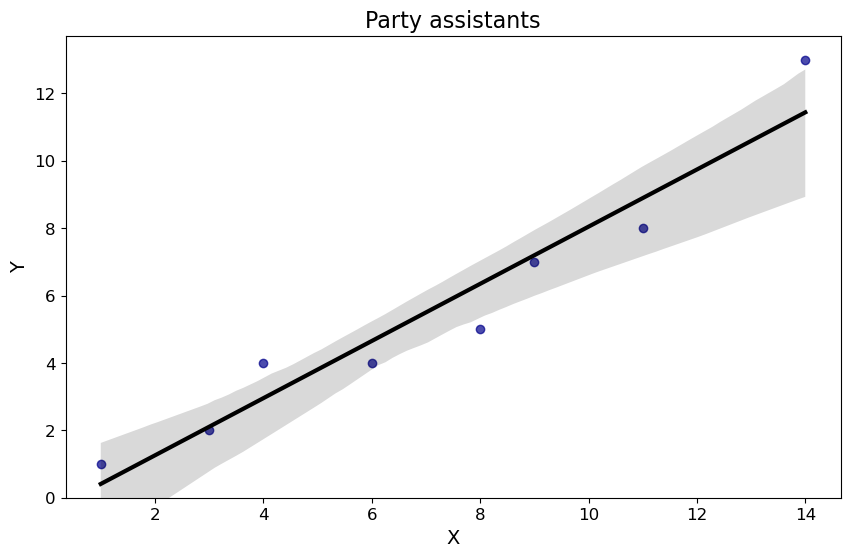

In [326]:
scatter_color = "#00008B"
line_color = "#000000"

plt.figure(figsize=(10, 6))

sns.regplot(x="X", y='Y', data=party,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title("Party assistants", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [343]:
X_part=party["X"].values.reshape(-1,1)
y_part=party["Y"]

In [353]:
X_trainp,X_testp,y_trainp,y_testp=train_test_split(X_part,y_part,test_size=.5,random_state=42)


In [355]:
model=LinearRegression()
model.fit(X_trainp,y_trainp)

LinearRegression()

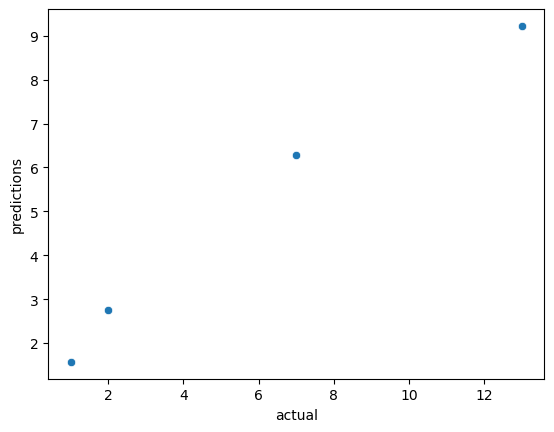

In [359]:
predictions_p=model.predict(X_testp)
ev_df_party=pd.DataFrame({"actual":y_testp,"predictions":predictions_p})
sns.scatterplot(data=ev_df_party, x='actual', y='predictions')
plt.show()

*I can see in the scatterplot that the data could have a linear relationship without doing the regression or any type of tests*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# I can remove the outliers usgin Q1 and Q3 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*